In [59]:
#!/usr/bin/env python
# from XrayDB example script python/examples/mu_components.py
# plot components of X-ray mass attenuation for elements

import numpy as np
import matplotlib.pyplot as plt
import xraydb
from xraydb import mu_elam

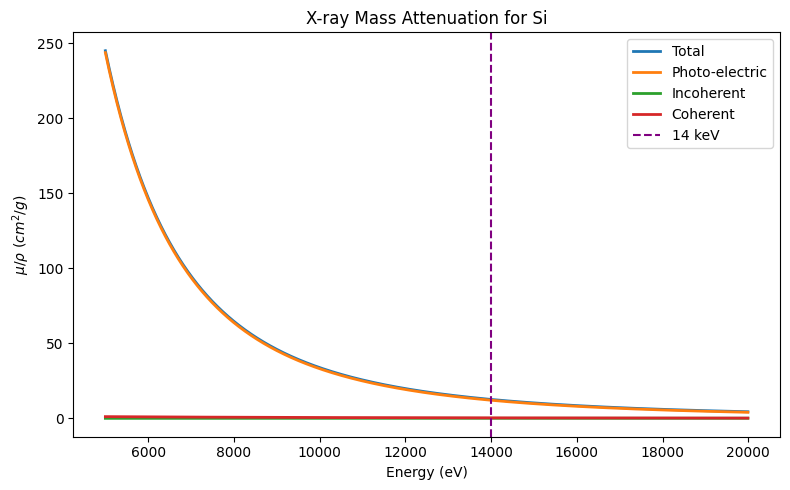

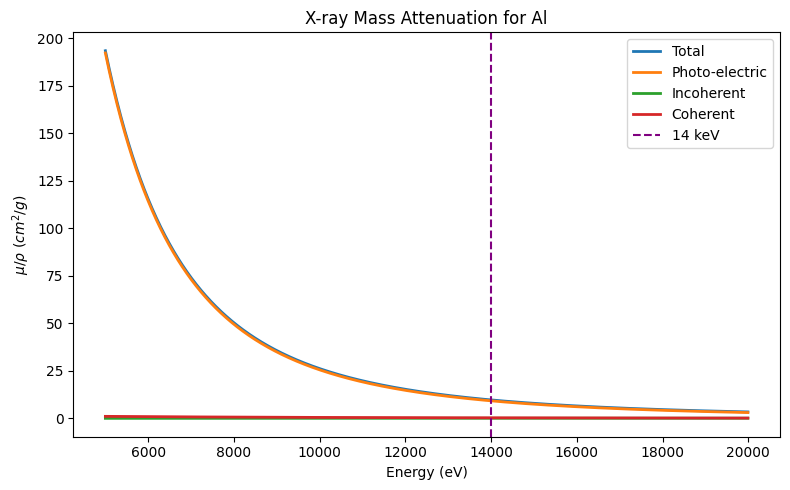

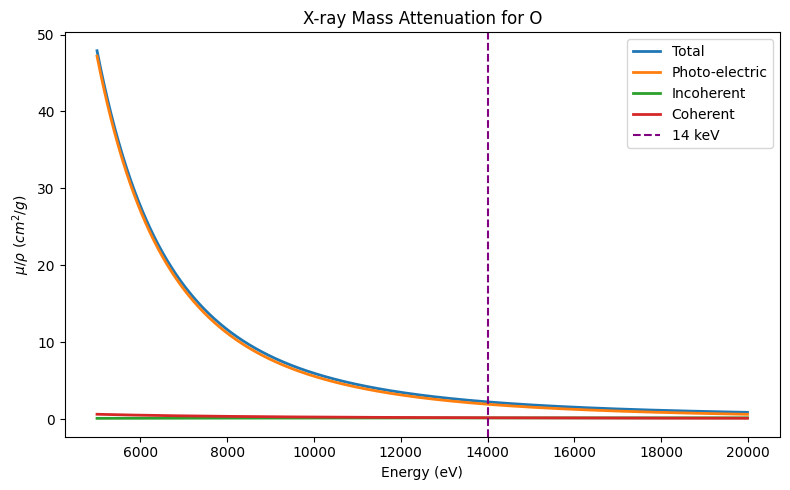

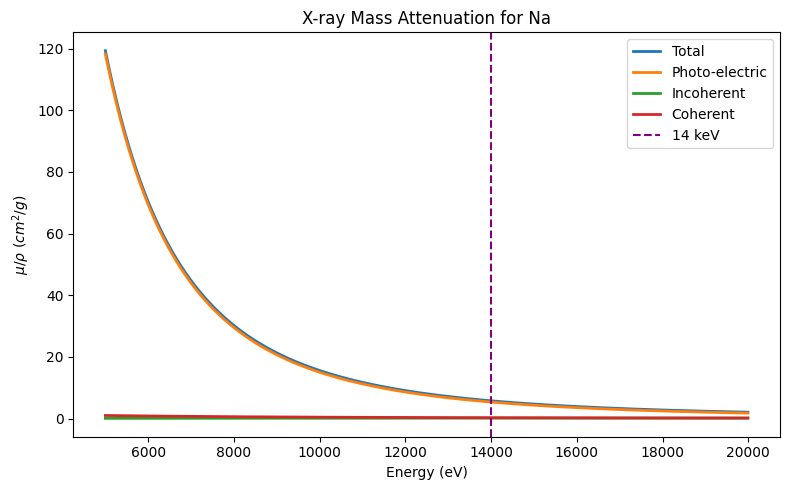

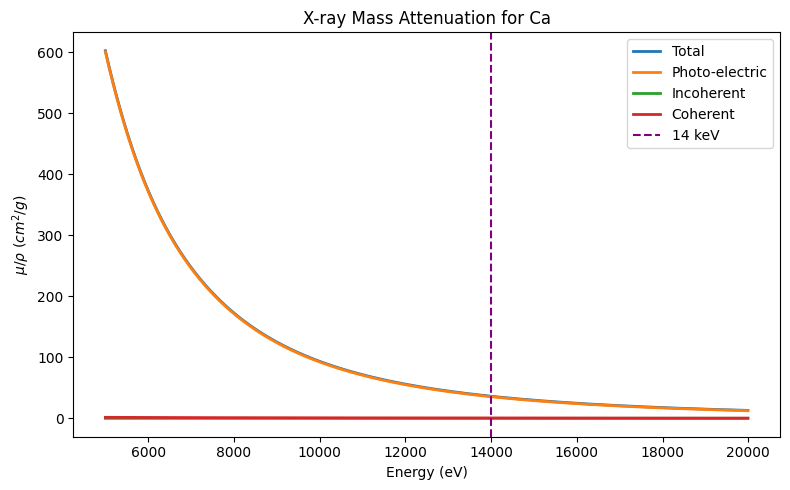

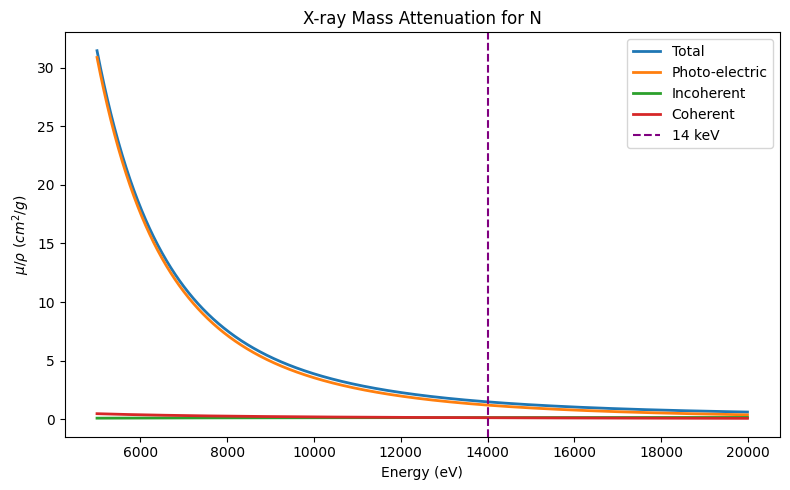

In [58]:
# Energy range (eV)
energy = np.arange(5000, 20000, 10)

# List of elements to plot
elements = ['Si', 'Al', 'O', 'Na', 'Ca', 'N'] # more elements can be added

# Function to plot attenuation for an element
def plot_mu_components(element, energy):
    mu_total = mu_elam(element, energy, kind='total')
    mu_photo = mu_elam(element, energy, kind='photo')
    mu_incoh = mu_elam(element, energy, kind='incoh')
    mu_coher = mu_elam(element, energy, kind='coh')

    plt.figure(figsize=(8, 5))
    plt.title(f'X-ray Mass Attenuation for {element}')
    plt.plot(energy, mu_total, label='Total', linewidth=2)
    plt.plot(energy, mu_photo, label='Photo-electric', linewidth=2)
    plt.plot(energy, mu_incoh, label='Incoherent', linewidth=2)
    plt.plot(energy, mu_coher, label='Coherent', linewidth=2)
    plt.axvline(x=14000, color='purple', ls='--', label='14 keV')
    plt.xlabel('Energy (eV)')
    plt.ylabel(r'$\mu/\rho \ (cm^2/g)$')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Loop over elements and plot
for elem in elements:
    plot_mu_components(elem, energy)

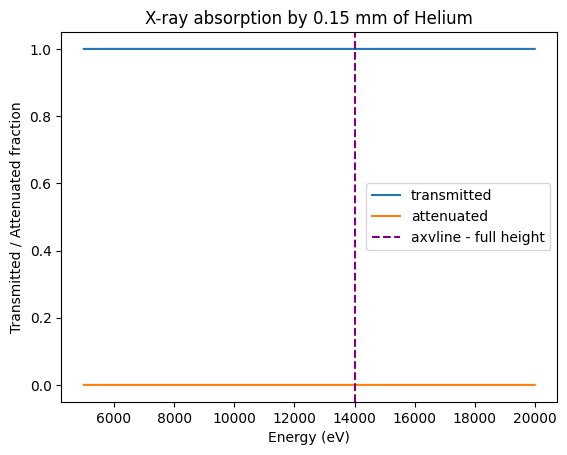

He 1/e depth at 14keV = 263179.868 mm


In [57]:
mu = material_mu('He', energy, density=0.000178)

# mu is returned in 1/cm
trans = np.exp(-0.015 * mu)

plt.plot(energy, trans, label='transmitted')
plt.plot(energy, 1-trans, label='attenuated')
plt.title('X-ray absorption by 0.15 mm of Helium')
plt.xlabel('Energy (eV)')
plt.axvline(x=14000, color='purple', ls='--', label='axvline - full height')
plt.ylabel('Transmitted / Attenuated fraction')
plt.legend()
plt.show()

mu_14kev = xraydb.material_mu('He', 14000, density=0.000178)
print("He 1/e depth at 14keV = {:.3f} mm".format(10/mu_14kev))

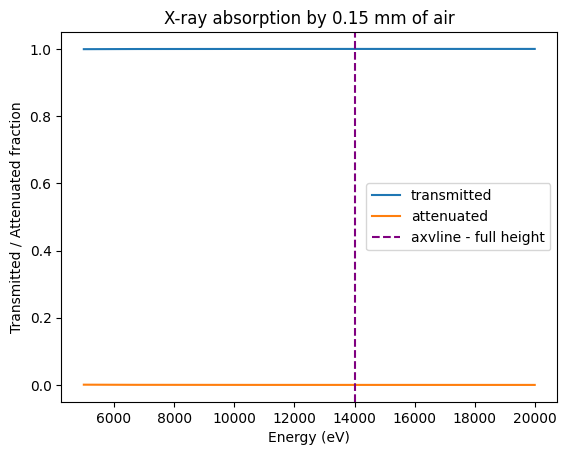

Air 1/e depth at 14keV = 4184.815 mm


In [56]:
import xraydb
mu = material_mu('Air', energy, density=0.001225)

# mu is returned in 1/cm
trans = np.exp(-0.015 * mu)

plt.plot(energy, trans, label='transmitted')
plt.plot(energy, 1-trans, label='attenuated')
plt.title('X-ray absorption by 0.15 mm of air')
plt.xlabel('Energy (eV)')
plt.axvline(x=14000, color='purple', ls='--', label='axvline - full height')
plt.ylabel('Transmitted / Attenuated fraction')
plt.legend()
plt.show()

mu_14kev = xraydb.material_mu('Air', 14000, density=0.001225)
print("Air 1/e depth at 14keV = {:.3f} mm".format(10/mu_14kev))

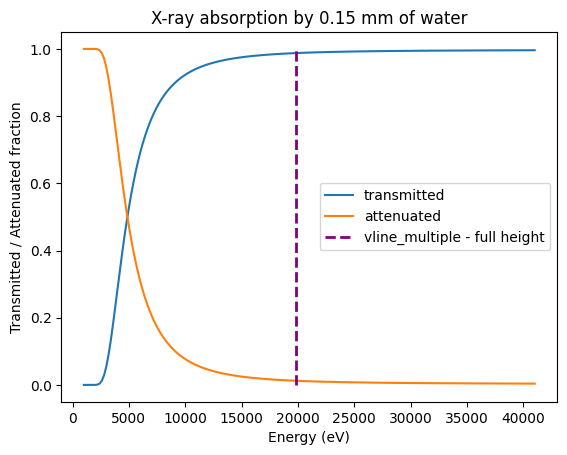

H2O 1/e depth at 14keV = 4.949 mm


In [63]:
#!/usr/bin/env python
# XrayDB example script    python/examples/mu_water.py

# calculate the fraction of X-rays transmitted through 1 mm of water

energy = np.linspace(1000, 41000, 201)

mu = material_mu('H2O', energy)

# mu is returned in 1/cm
trans = np.exp(-0.015 * mu)

plt.plot(energy, trans, label='transmitted')
plt.plot(energy, 1-trans, label='attenuated')
plt.title('X-ray absorption by 0.15 mm of water')
plt.xlabel('Energy (eV)')
plt.vlines(x=[19850], ymin=0, ymax=1, colors='purple', ls='--', lw=2, label='vline_multiple - full height')
plt.ylabel('Transmitted / Attenuated fraction')
plt.legend()
plt.show()

mu_14kev = xraydb.material_mu('H2O', 14000)
print("H2O 1/e depth at 14keV = {:.3f} mm".format(10/mu_14kev))

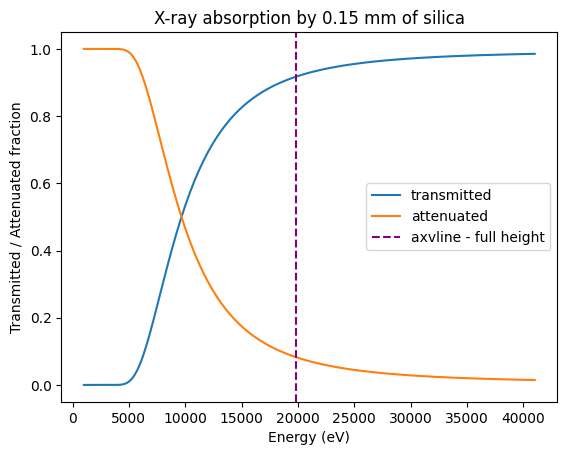

SiO2 1/e depth at 14keV = 0.640 mm


In [64]:
mu = material_mu('SiO2', energy, density=2.2)

# mu is returned in 1/cm
trans = np.exp(-0.015 * mu)

plt.plot(energy, trans, label='transmitted')
plt.plot(energy, 1-trans, label='attenuated')
plt.title('X-ray absorption by 0.15 mm of silica')
plt.xlabel('Energy (eV)')
plt.axvline(x=19850, color='purple', ls='--', label='axvline - full height')
plt.ylabel('Transmitted / Attenuated fraction')
plt.legend()
plt.show()

mu_14kev = xraydb.material_mu('SiO2', 14000, density=2.2)
print("SiO2 1/e depth at 14keV = {:.3f} mm".format(10/mu_14kev))

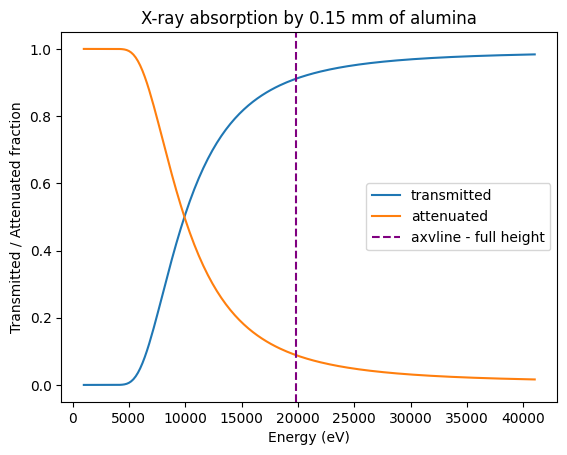

Al2O3 1/e depth at 14keV = 0.448 mm


In [65]:
mu = material_mu('Al2O3', energy, density=2.71)

# mu is returned in 1/cm
trans = np.exp(-0.015 * mu)

plt.plot(energy, trans, label='transmitted')
plt.plot(energy, 1-trans, label='attenuated')
plt.title('X-ray absorption by 0.15 mm of alumina')
plt.xlabel('Energy (eV)')
plt.axvline(x=19850, color='purple', ls='--', label='axvline - full height')
plt.ylabel('Transmitted / Attenuated fraction')
plt.legend()
plt.show()
mu_14kev = xraydb.material_mu('Al2O3', 14000, density=3.6)
print("Al2O3 1/e depth at 14keV = {:.3f} mm".format(10/mu_14kev))

In [66]:
# Define the components of your multi-component system
components = [
    {'name': 'Si', 'density': 2.2, 'fraction': 1}
    #{'name': 'B2O3', 'density': 2.46, 'fraction': 0.25}, 
    #{'name': 'Na2O', 'density': 2.27, 'fraction': 0.25} 
    #{'name': 'Na2O', 'density': 2.27, 'fraction': 0.25}  
    #{'name': 'Na2O', 'density': 2.27, 'fraction': 0.25} 
]

# Calculate the representative density based on the weight fractions of each component
representative_density = sum(component['fraction'] * component['density'] for component in components)

# Initialize total depth
total_depth_mm = 0

# Iterate over each component
for component in components:
    # Calculate the mass attenuation coefficient (mu) for the component at 14 keV using the representative density
    mu_14keV = material_mu(component['name'], 14000, density=representative_density)

    # Calculate the 1/e depth in mm for this component
    depth_1e_mm = 10 / mu_14keV

    # Add the contribution of this component to the total depth
    total_depth_mm += depth_1e_mm * component['fraction']

# Print the total 1/e depth
print("Total 1/e depth at 14 keV for the multi-component system = {:.3f} mm".format(total_depth_mm))

Total 1/e depth at 14 keV for the multi-component system = 0.359 mm


In [67]:
# Define the components of your multi-component system
components = [
    {'name': 'SiO2', 'density': 2.2, 'fraction': 1}
]

# Calculate the representative density based on the weight fractions of each component
representative_density = sum(component['fraction'] * component['density'] for component in components)

# Initialize total depth
total_depth_mm = 0

# Iterate over each component
for component in components:
    # Calculate the mass attenuation coefficient (mu) for the component at 14 keV using the representative density
    mu_14keV = material_mu(component['name'], 14000, density=representative_density)

    # Calculate the 1/e depth in mm for this component
    depth_1e_mm = 10 / mu_14keV

    # Add the contribution of this component to the total depth
    total_depth_mm += depth_1e_mm * component['fraction']

# Print the total 1/e depth
print("Total 1/e depth at 14 keV for the multi-component system = {:.3f} mm".format(total_depth_mm))

Total 1/e depth at 14 keV for the multi-component system = 0.640 mm


In [68]:
# If you need to know the 1/e for a composition in wt% of different components
# 3 component system

from xraydb import material_mu

# Define the components of your multi-component system
components = [
    {'name': 'SiO2', 'density': 2.21, 'fraction': 0.603},  # Example: SiO2 with 50% weight fraction
    {'name': 'Al2O3', 'density': 3.95, 'fraction': 0.239}, # Example: Al2O3 with 30% weight fraction
    {'name': 'Na2O', 'density': 2.27, 'fraction': 0.157}  # Example: Fe2O3 with 20% weight fraction
]

# Calculate the representative density based on the weight fractions of each component
representative_density = sum(component['fraction'] * component['density'] for component in components)

# Initialize total depth
total_depth_mm = 0

# Iterate over each component
for component in components:
    # Calculate the mass attenuation coefficient (mu) for the component at 14 keV using the representative density
    mu_14keV = material_mu(component['name'], 14000, density=representative_density)

    # Calculate the 1/e depth in mm for this component
    depth_1e_mm = 10 / mu_14keV

    # Add the contribution of this component to the total depth
    total_depth_mm += depth_1e_mm * component['fraction']

# Print the total 1/e depth
print("Total 1/e depth at 14 keV for the multi-component system = {:.3f} mm".format(total_depth_mm))

Total 1/e depth at 14 keV for the multi-component system = 0.592 mm


In [70]:
# Conversion of molar mass into weight fractions for a multi component system

# Molar masses of Na2O, CaO, and SiO2 in g/mol
molar_masses = {
    'Na2O': 61.97894 + 15.999 * 2,  # Na: 22.98976928, O: 15.999
    'CaO': 40.078 + 15.999,          # Ca: 40.078, O: 15.999
    'SiO2': 28.0855 + 15.999 * 2     # Si: 28.0855, O: 15.999
}

# Mole percentages of Na2O, CaO, and SiO2
x_mole_percent = 10  # Example: 30%
y_mole_percent = 10  # Example: 40%
z_mole_percent = 80  # Example: 30%

# Convert mole percentages to mole fractions
x_mole_fraction = x_mole_percent / 100
y_mole_fraction = y_mole_percent / 100
z_mole_fraction = z_mole_percent / 100

# Calculate total mole fraction
total_mole_fraction = x_mole_fraction + y_mole_fraction + z_mole_fraction

# Calculate the weight fractions
x_weight_fraction = x_mole_fraction * molar_masses['Na2O'] / total_mole_fraction
y_weight_fraction = y_mole_fraction * molar_masses['CaO'] / total_mole_fraction
z_weight_fraction = z_mole_fraction * molar_masses['SiO2'] / total_mole_fraction

print("Weight fraction of Na2O:", x_weight_fraction)
print("Weight fraction of CaO:", y_weight_fraction)
print("Weight fraction of SiO2:", z_weight_fraction)


Weight fraction of Na2O: 9.397694
Weight fraction of CaO: 5.607700000000001
Weight fraction of SiO2: 48.0668


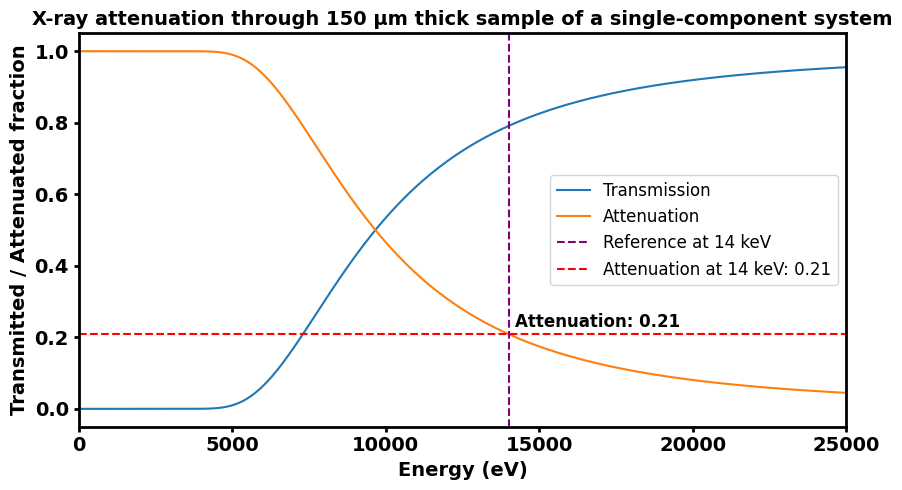

Total attenuation depth (1/e) at 14 keV for the single-component system: 0.6400 mm (640.0 µm)


In [73]:
# Define the component of your system along with their weight fractions
components = [
    {'name': 'SiO2', 'fraction': 1},  # SiO2 with 100% weight fraction
]

# Manually input the bulk density of the system
system_density = 2.2  # density of the system is 2.2 g/cm^3

# Calculate the total mass of the system
total_mass = sum(component['fraction'] for component in components)

# Calculate the representative density based on the weight fractions and the system density
for component in components:
    component['density'] = system_density * component['fraction'] / total_mass

# Energy range (eV)
start = 0
end = 25000
points = 500

energy = np.linspace(start, end, 500)

# Calculate total mu for the multi-component system
mu = np.zeros_like(energy)
for component in components:
    mu += component['fraction'] * material_mu(component['name'], energy, density=component['density'])

# Thickness in microns
t = 150  # thickness along the beam in µm
transmission = np.exp(-(t / 10000) * mu)

# X-ray energy of interest
# Typically the energy to be used for characterizing
# Eg: for Cu = 8047.8227 eV
E = 14000 # (eV)

# Plot results
plt.figure(figsize=(9,5))
ax = plt.gca()
for spine in ['bottom', 'left', 'right', 'top']:
    ax.spines[spine].set_linewidth(2)
plt.plot(energy, transmission, label='Transmission')
plt.plot(energy, 1-transmission, label='Attenuation')
plt.axvline(x=E, color='purple', linestyle='--', label=f'Reference at {E/1000:.0f} keV')
attenuation_at_E = 1 - np.interp(E, energy, transmission)
plt.axhline(y=attenuation_at_E, color='red', linestyle='--', label=f"Attenuation at {E/1000:.0f} keV: {attenuation_at_E:.2f}")
# Add annotation for the intersection point on the y-axis
plt.text(E + 200, attenuation_at_E + 0.02, f'Attenuation: {attenuation_at_E:.2f}', color='black', fontsize= 12, fontweight ='bold')
plt.title(f"X-ray attenuation through {t} µm thick sample of a single-component system", fontsize= 14, fontweight ='bold')
plt.xlim(start, end)
plt.tick_params(axis='both', which='major', labelsize=14, width=2)
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.xlabel('Energy (eV)', fontsize= 14, fontweight ='bold')
plt.ylabel('Transmitted / Attenuated fraction', fontsize= 14, fontweight ='bold')
plt.legend(fontsize = 12)
plt.tight_layout()
plt.show()

mu_at_target = np.interp(E, energy, mu)  # interpolate mu at the defined or target E in keV
depth_mm = 10 / mu_at_target
depth_um = depth_mm * 1e3  # convert mm to µm
print(f"Total attenuation depth (1/e) at {E/1000:.0f} keV for the single-component system: {depth_mm:.4f} mm ({depth_um:.1f} µm)")

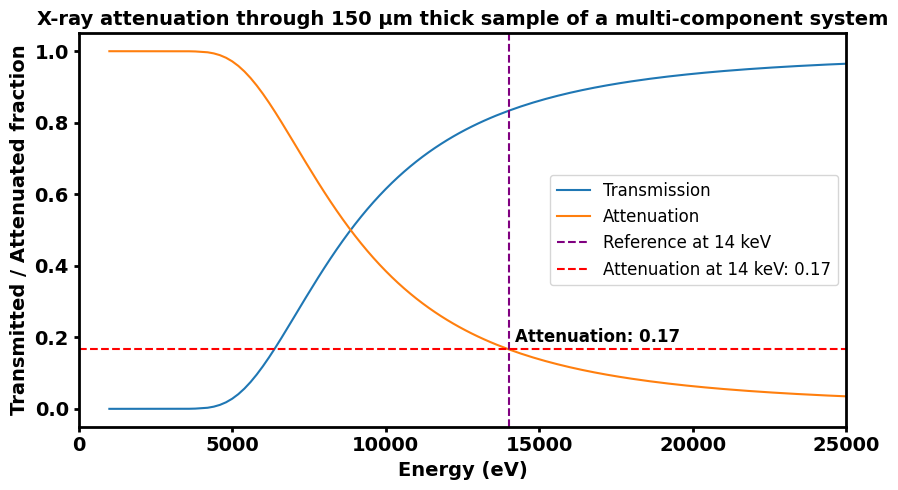

Total attenuation depth (1/e) at 14 keV for the multi-component system: 0.8232 mm (823.2 µm)


In [75]:
# For a typical or commercial window glass composition

# Define the components of your multi-component system along with their weight fractions
components = [
    {'name': 'SiO2', 'fraction': 0.8},  # Example: SiO2 with 80% weight fraction
    {'name': 'CaO', 'fraction': 0.1}, # Example: CaO3 with 10% weight fraction
    {'name': 'Na2O', 'fraction': 0.1}  # Example: Na2O with 10% weight fraction
]

# Manually input the density of the system
system_density = 2.5  # Example: density of the system is 2.2 g/cm^3

# Calculate the total mass of the system
total_mass = sum(component['fraction'] for component in components)

# Calculate the representative density based on the weight fractions and the system density
for component in components:
    component['density'] = system_density * component['fraction'] / total_mass

# Energy range (eV)
start = 0
end = 25000
points = 500

energy = np.linspace(start, end, points)

# Calculate total mu for the multi-component system
mu = np.zeros_like(energy)
for component in components:
    mu += component['fraction'] * material_mu(component['name'], energy, density=component['density'])

# Thickness in microns
t = 150  # thickness along the beam in µm
transmission = np.exp(-(t / 10000) * mu)

# X-ray energy of interest
# Typically the energy to be used for characterizing
# Eg: for Cu = 8047.8227 eV
E = 14000 # (eV)

# Plot results
plt.figure(figsize=(9,5))
ax = plt.gca()
for spine in ['bottom', 'left', 'right', 'top']:
    ax.spines[spine].set_linewidth(2)
plt.plot(energy, transmission, label='Transmission')
plt.plot(energy, 1-transmission, label='Attenuation')
plt.axvline(x=E, color='purple', linestyle='--', label=f'Reference at {E/1000:.0f} keV')
attenuation_at_E = 1 - np.interp(E, energy, transmission)
plt.axhline(y=attenuation_at_E, color='red', linestyle='--', label=f"Attenuation at {E/1000:.0f} keV: {attenuation_at_E:.2f}")
# Add annotation for the intersection point on the y-axis
plt.text(E + 200, attenuation_at_E + 0.02, f'Attenuation: {attenuation_at_E:.2f}', color='black', fontsize= 12, fontweight ='bold')
plt.title(f"X-ray attenuation through {t} µm thick sample of a multi-component system", fontsize= 14, fontweight ='bold')
plt.xlim(start, end)
plt.tick_params(axis='both', which='major', labelsize=14, width=2)
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.xlabel('Energy (eV)', fontsize= 14, fontweight ='bold')
plt.ylabel('Transmitted / Attenuated fraction', fontsize= 14, fontweight ='bold')
plt.legend(fontsize = 12)
plt.tight_layout()
plt.show()

mu_at_target = np.interp(E, energy, mu)  # interpolate mu at the defined or target E in keV
depth_mm = 10 / mu_at_target
depth_um = depth_mm * 1e3  # convert mm to µm
print(f"Total attenuation depth (1/e) at {E/1000:.0f} keV for the multi-component system: {depth_mm:.4f} mm ({depth_um:.1f} µm)")


Weight fractions:
Na2O: 0.1490
CaO: 0.0889
SiO2: 0.7621


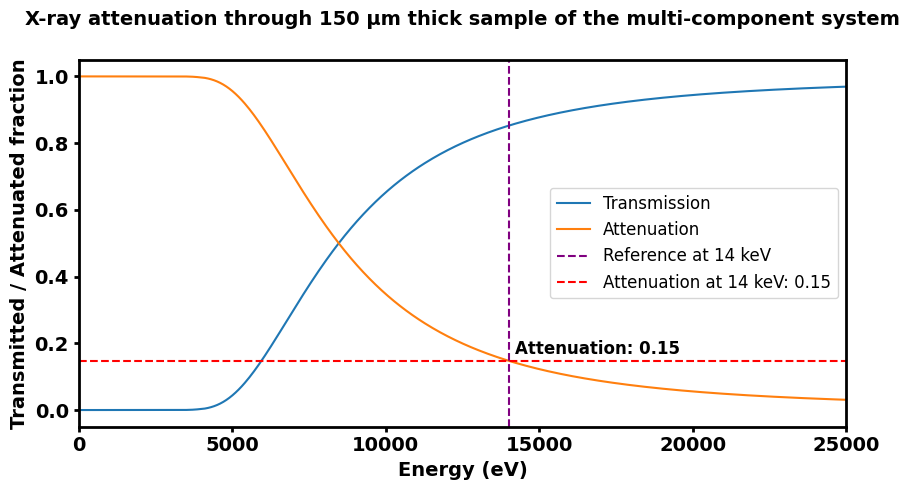

Total attenuation depth (1/e) at 14 keV for the multi-component system: 0.9380 mm (938.0 µm)


In [ ]:
# Multi component oxide systems such as oxide glasses

# For example here the multi-component system has the components Na2O, CaO, and SiO2 
molar_masses = {
    'Na2O': 61.97894 + 15.999 * 2,
    'CaO': 40.078 + 15.999,          # Ca: 40.078, O: 15.999
    'SiO2': 28.0855 + 15.999 * 2,
    # 'B2O3': 10.811 * 2 + 15.999 * 3,
    # 'Al2O3': 26.9815385 * 2 + 15.999 * 3
    # more components
    #
    #
    #
}

# input composition in mole % (should sum-up to 100%)
mole_percents = {
    'Na2O': 10.000,
    'CaO': 10.000,
    'SiO2': 80.000,
    # 'B2O3': 27.086,
    # 'Al2O3': 5.000,
    #
    #
    #
}

# Convert mole % to mole fraction
mole_fractions = {k: v / 100 for k, v in mole_percents.items()}

# Calculate weight fractions
unnormalized_weights = {k: mole_fractions[k] * molar_masses[k] for k in molar_masses}
total_weight = sum(unnormalized_weights.values())
weight_fractions = {k: unnormalized_weights[k]/total_weight for k in molar_masses}

# Display the weight fractions
print("Weight fractions:")
for k, v in weight_fractions.items():
    print(f"{k}: {v:.4f}")

# Bulk density of the material (g/cm^3)
system_density = 2.4

# Assign densities proportional to weight fraction
densities = {k: system_density * weight_fractions[k] for k in molar_masses}

# Energy range (eV)
start = 0
end = 25000
points = 500

# Energy range (eV)
energy = np.linspace(start, end, points)

# Calculate total mu (1/cm)
mu = np.zeros_like(energy)
for k in molar_masses:
    mu += weight_fractions[k] * material_mu(k, energy, density=densities[k])

# Thickness in microns
t = 150  # thickness along the beam in µm
transmission = np.exp(-(t / 10000) * mu)

# X-ray energy of interest
# Typically the energy to be used for characterizing
# Eg: for Cu = 8047.8227 eV
E = 14000 # (eV)

# Plot results
plt.figure(figsize=(9,5))
ax = plt.gca()
for spine in ['bottom', 'left', 'right', 'top']:
    ax.spines[spine].set_linewidth(2)
plt.plot(energy, transmission, label='Transmission')
plt.plot(energy, 1-transmission, label='Attenuation')
plt.axvline(x=E, color='purple', linestyle='--', label=f'Reference at {E/1000:.0f} keV')
attenuation_at_E = 1 - np.interp(E, energy, transmission)
plt.axhline(y=attenuation_at_E, color='red', linestyle='--', label=f"Attenuation at {E/1000:.0f} keV: {attenuation_at_E:.2f}")
# Add annotation for the intersection point on the y-axis
plt.text(E + 200, attenuation_at_E + 0.02, f'Attenuation: {attenuation_at_E:.2f}', color='black', fontsize= 12, fontweight ='bold')
plt.title(f"X-ray attenuation through {t} µm thick sample of the multi-component system", fontsize= 14, fontweight ='bold', pad = 25)
plt.xlim(start, end)
plt.tick_params(axis='both', which='major', labelsize=14, width=2)
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.xlabel('Energy (eV)', fontsize= 14, fontweight ='bold')
plt.ylabel('Transmitted / Attenuated fraction', fontsize= 14, fontweight ='bold')
plt.legend(fontsize = 12)
plt.tight_layout()
plt.show()

mu_at_target = np.interp(E, energy, mu)  # interpolate mu at the defined or target E in keV
depth_mm = 10 / mu_at_target
depth_um = depth_mm * 1e3  # convert mm to µm
print(f"Total attenuation depth (1/e) at {E/1000:.0f} keV for the multi-component system: {depth_mm:.4f} mm ({depth_um:.1f} µm)")
